In [1]:
import tensorflow as tf
import numpy as np
from datetime import datetime as dt

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

In [4]:
saver = tf.train.import_meta_graph("./CH14/models/my_time_series_model.meta")

for op in tf.get_default_graph().get_operations():
    print(op.name)

Placeholder
Placeholder_1
rnn/Rank
rnn/range/start
rnn/range/delta
rnn/range
rnn/concat/values_0
rnn/concat/axis
rnn/concat
rnn/transpose
rnn/Shape
rnn/strided_slice/stack
rnn/strided_slice/stack_1
rnn/strided_slice/stack_2
rnn/strided_slice
rnn/BasicRNNCellZeroState/ExpandDims/dim
rnn/BasicRNNCellZeroState/ExpandDims
rnn/BasicRNNCellZeroState/Const
rnn/BasicRNNCellZeroState/concat/axis
rnn/BasicRNNCellZeroState/concat
rnn/BasicRNNCellZeroState/zeros/Const
rnn/BasicRNNCellZeroState/zeros
rnn/BasicRNNCellZeroState/ExpandDims_1/dim
rnn/BasicRNNCellZeroState/ExpandDims_1
rnn/BasicRNNCellZeroState/Const_1
rnn/Shape_1
rnn/strided_slice_1/stack
rnn/strided_slice_1/stack_1
rnn/strided_slice_1/stack_2
rnn/strided_slice_1
rnn/Shape_2
rnn/strided_slice_2/stack
rnn/strided_slice_2/stack_1
rnn/strided_slice_2/stack_2
rnn/strided_slice_2
rnn/ExpandDims/dim
rnn/ExpandDims
rnn/Const
rnn/concat_1/axis
rnn/concat_1
rnn/zeros/Const
rnn/zeros
rnn/time
rnn/TensorArray
rnn/TensorArray_1
rnn/TensorArrayUnst

gradients/rnn/while/basic_rnn_cell/MatMul_grad/MatMul_1/StackPushV2_2
gradients/rnn/while/basic_rnn_cell/MatMul_grad/MatMul_1/StackPopV2/Enter_2
gradients/rnn/while/basic_rnn_cell/MatMul_grad/MatMul_1/StackPopV2_2
gradients/rnn/while/basic_rnn_cell/MatMul_grad/MatMul_1_2
gradients/rnn/while/basic_rnn_cell/MatMul_grad/tuple/group_deps_2
gradients/rnn/while/basic_rnn_cell/MatMul_grad/tuple/control_dependency_3
gradients/rnn/while/basic_rnn_cell/MatMul_grad/tuple/control_dependency_1_2
gradients/rnn/while/basic_rnn_cell/BiasAdd/Enter_grad/b_acc_5
gradients/rnn/while/basic_rnn_cell/BiasAdd/Enter_grad/b_acc_1_2
gradients/rnn/while/basic_rnn_cell/BiasAdd/Enter_grad/b_acc_2_2
gradients/rnn/while/basic_rnn_cell/BiasAdd/Enter_grad/Switch_2
gradients/rnn/while/basic_rnn_cell/BiasAdd/Enter_grad/Add_2
gradients/rnn/while/basic_rnn_cell/BiasAdd/Enter_grad/NextIteration_2
gradients/rnn/while/basic_rnn_cell/BiasAdd/Enter_grad/b_acc_3_2
gradients/rnn/while/basic_rnn_cell/concat_grad/Const_2
gradients/

In [5]:
from tensorflow_graph_in_jupyter import show_graph

In [6]:
show_graph(tf.get_default_graph())

In [7]:
X = tf.get_default_graph().get_tensor_by_name("Placeholder:0")
outputs = tf.get_default_graph().get_tensor_by_name("outputs:0")

In [8]:
n_steps = 20

with tf.Session() as sess:                        # not shown in the book
    saver.restore(sess, "./CH14/models/my_time_series_model") # not shown

    sequence = [0.] * n_steps
    for iteration in range(300):
        X_batch = np.array(sequence[-n_steps:]).reshape(1, n_steps, 1)
        y_pred = sess.run(outputs, feed_dict={X: X_batch})
        sequence.append(y_pred[0, -1, 0])

INFO:tensorflow:Restoring parameters from ./CH14/models/my_time_series_model


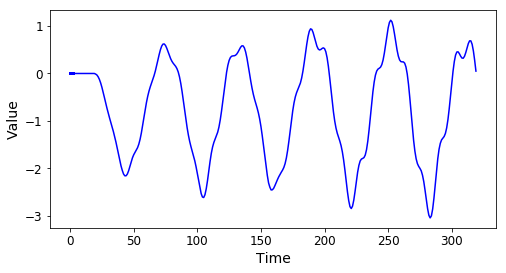

In [11]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

t_min, t_max = 0, 40
resolution = 0.1
t = np.linspace(t_min, t_max, int((t_max - t_min) / resolution))
plt.figure(figsize=(8,4))
plt.plot(np.arange(len(sequence)), sequence, "b-")
plt.plot(t[:n_steps], sequence[:n_steps], "b-", linewidth=3)
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()